In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from aggregators import aggregator_mean
from preprocessing import load_data,data_to_clients_random,data_to_clients_pond,data_to_clients_custom
from train import net
from federated_learning import federated

dataset = 'MNIST' # 'CIFAR-10' or 'MNIST'

n_clients = 5
epochs = 10
epochs_FL = 1
# load the dataset

(X_train, y_train, X_test, y_test) = load_data(dataset=dataset)

In [2]:
# distributed data to clients
# Choose between data_to_clients_random,data_to_clients_pond, and data_to_clients_custom to see the differences
X_clients, y_clients = data_to_clients_custom(X_train, y_train,n_clients=n_clients)

IndexError: index 9748 is out of bounds for axis 0 with size 8298

Centralized Machine Learning




63/63 [==============================] - 0s 3ms/step
Accuracy of the model: 0.953
Client 1
63/63 [==============================] - 0s 3ms/step
Accuracy of the model: 0.905
Client 2
63/63 [==============================] - 0s 3ms/step
Accuracy of the model: 0.913
Client 3
63/63 [==============================] - 0s 3ms/step
Accuracy of the model: 0.910
Client 4
63/63 [==============================] - 0s 4ms/step
Accuracy of the model: 0.916
63/63 [==============================] - 0s 3ms/step
Federated learning iteration:  1
63/63 [==============================] - 0s 3ms/step
Federated Accuracy:  0.4545
Federated learning iteration:  2
63/63 [==============================] - 0s 4ms/step
Federated Accuracy:  0.852
Federated learning iteration:  3
63/63 [==============================] - 0s 4ms/step
Federated Accuracy:  0.8765
Federated learning iteration:  4
63/63 [==============================] - 0s 4ms/step
Federated Accuracy:  0.8995
Federated lea

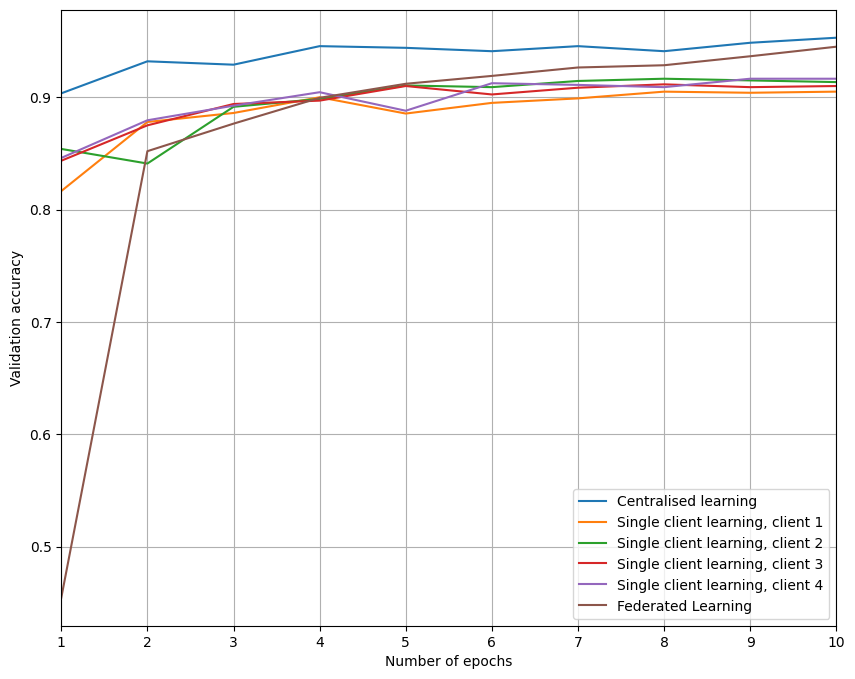

In [3]:
# centralized machine learning
print('Centralized Machine Learning')
centralized_learning = net(X_train,y_train,X_test,y_test,epochs=epochs,dataset=dataset)
history_centralized = centralized_learning[2]

# local client machine learning
score_clients = []
history_clients = []

for i in range(len(X_clients)):
    print('Client',i+1)
    single_client_learning = net(X_clients[i],y_clients[i],X_test,y_test,epochs=epochs,dataset=dataset)
    score_clients.append(single_client_learning[3])
    history_clients.append(single_client_learning[2])

# federated learning
federated_learning = federated(X_clients, y_clients, X_test, y_test, fl_iterations=epochs,epochs_FL=epochs_FL,dataset=dataset)

plt.figure(figsize=(10, 8))
plt.plot(history_centralized.history['val_accuracy'], label='Centralised learning')

for i in range(len(X_clients)):
    plt.plot(history_clients[i].history['val_accuracy'], label='Single client learning, client ' + str(i + 1))

plt.plot(federated_learning, label='Federated Learning')
plt.xlabel('Number of epochs')
plt.ylabel('Validation accuracy')
plt.legend()
plt.grid()
plt.xticks(np.arange(0, epochs+1, 1), np.arange(1,epochs+2, 1))
plt.xlim(0, epochs-1)
plt.savefig('federated_learning_plot', dpi=300)
plt.show()

In [10]:
print(X_train.shape)
print(y_train.shape)

(10000, 784)
(10000, 10)
